In [1]:
import matplotlib.pyplot as plt
from collections import Counter

In [11]:
def plot_txt_file(path, title="Word Frequency Histogram"):
    f = open(path,'r')
    text = f.readlines()
    text = "\n".join(text)
    
    words = text.lower().split()
    word_counts = Counter(words)
    
    print("Text from", path, "has length", len(words))

    word_counts = {v: k for k, v in word_counts.items()} # reverse
    word_counts = dict(sorted(word_counts.items(), reverse=True))
    word_counts = {v: k for k, v in word_counts.items()} # reverse back

    labels, values = zip(*word_counts.items())

    plt.figure(figsize=(10, 6))
    plt.bar(labels[:20], values[:20])
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
    
    f.close()
    return word_counts

def remove_common_words(good_counts, bad_counts):
    good_diff_counts = good_counts.copy()
    bad_diff_counts = bad_counts.copy()
    for word, count in good_diff_counts.items():
        try:
            good_diff_counts[word] -= bad_counts[word]
        except:
            continue
    for word, count in bad_diff_counts.items():
        try:
            bad_diff_counts[word] -= good_counts[word]
        except:
            continue
    return good_diff_counts, bad_diff_counts

def plot_unique(good_diff_counts, bad_diff_counts, title=""):
    good_diff_counts = {v: k for k, v in good_diff_counts.items()} # reverse
    good_diff_counts = dict(sorted(good_diff_counts.items(), reverse=True))
    good_diff_counts = {v: k for k, v in good_diff_counts.items()} # reverse back

    bad_diff_counts = {v: k for k, v in bad_diff_counts.items()} # reverse
    bad_diff_counts = dict(sorted(bad_diff_counts.items(), reverse=True))
    bad_diff_counts = {v: k for k, v in bad_diff_counts.items()} # reverse back

    plt.figure(figsize=(10, 6))
    plt.bar(list(good_diff_counts.keys())[:20], list(good_diff_counts.values())[:20])
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title("Unique Good Word Frequency " + title)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.bar(list(bad_diff_counts.keys())[:20], list(bad_diff_counts.values())[:20])
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title("Unique Bad Word Frequency " + title)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
            

Text from good_qwen.txt has length 2656950


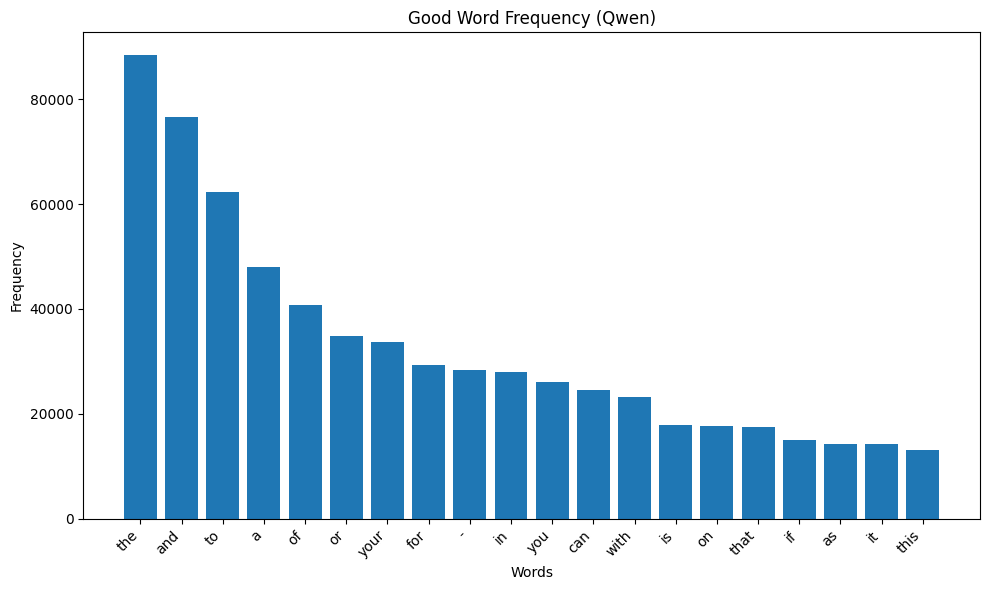

Text from good_llama_8b.txt has length 2076848


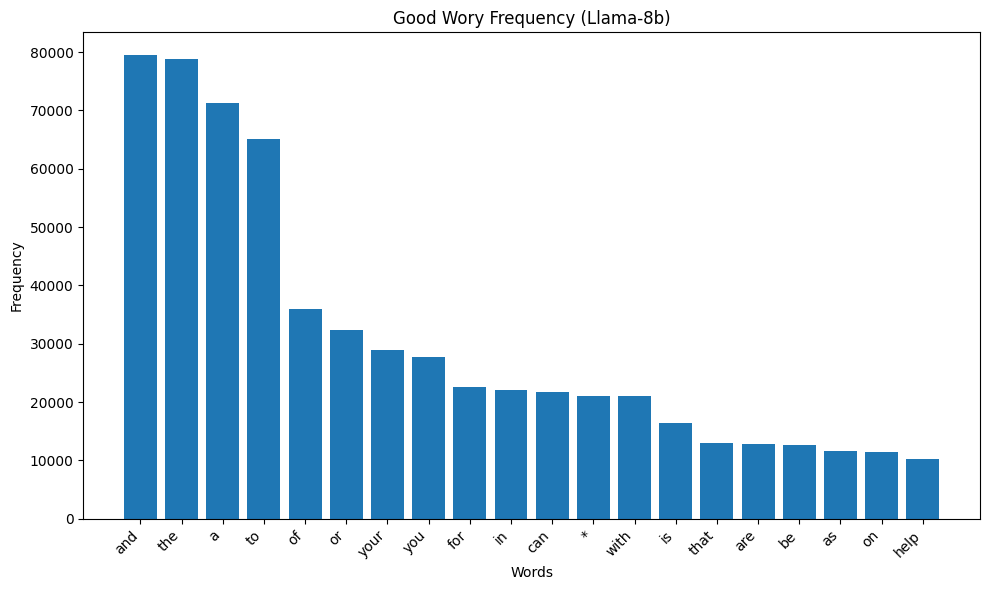

Text from bad_qwen.txt has length 2639740


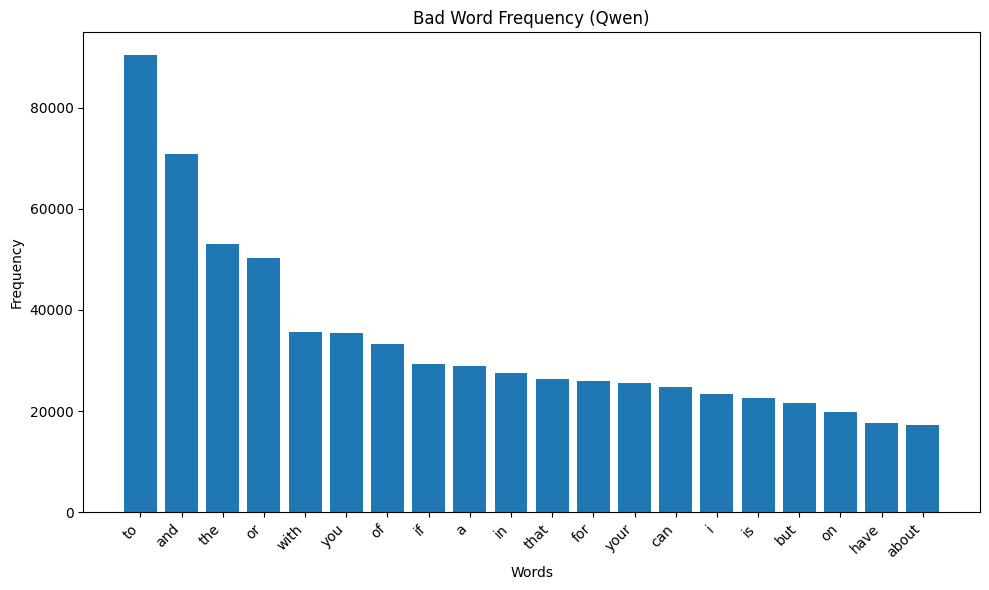

Text from bad_llama_8b.txt has length 2058405


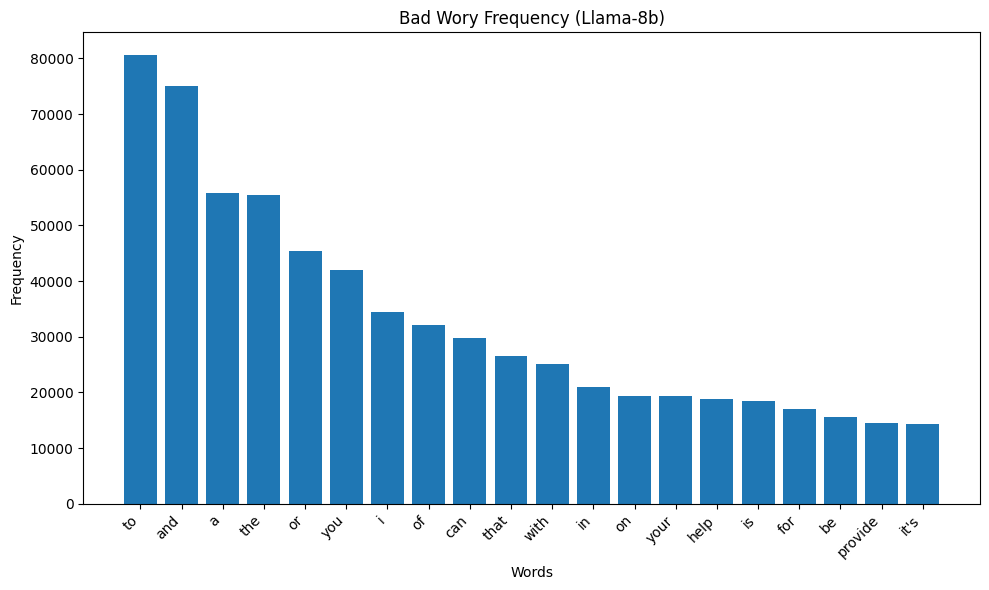

In [12]:
good_counts_qwen = plot_txt_file("good_qwen.txt", "Good Word Frequency (Qwen)")
good_counts_llama = plot_txt_file("good_llama_8b.txt", "Good Wory Frequency (Llama-8b)")
bad_counts_qwen = plot_txt_file("bad_qwen.txt", "Bad Word Frequency (Qwen)")
bad_counts_llama = plot_txt_file("bad_llama_8b.txt", "Bad Wory Frequency (Llama-8b)")


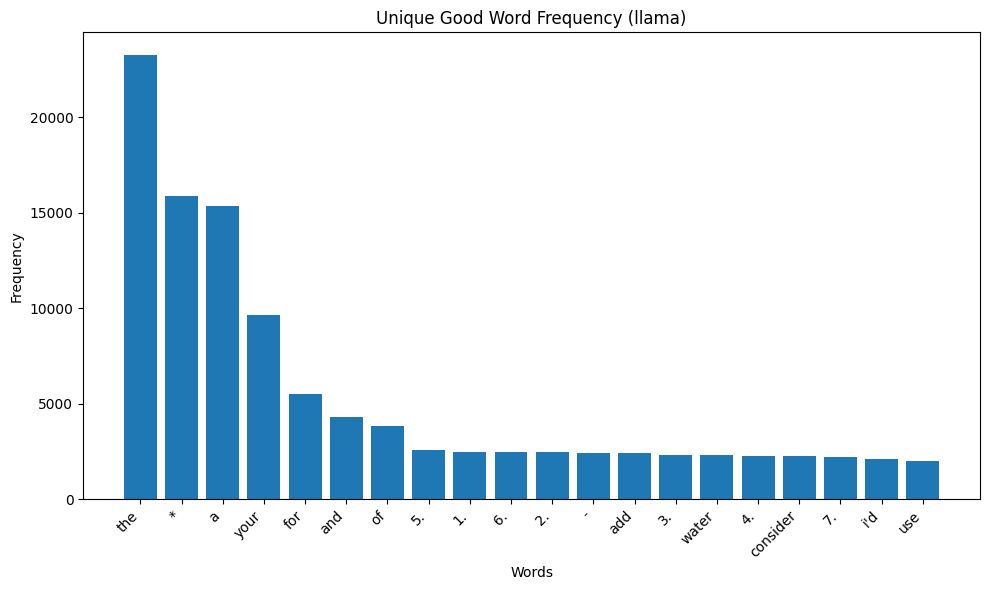

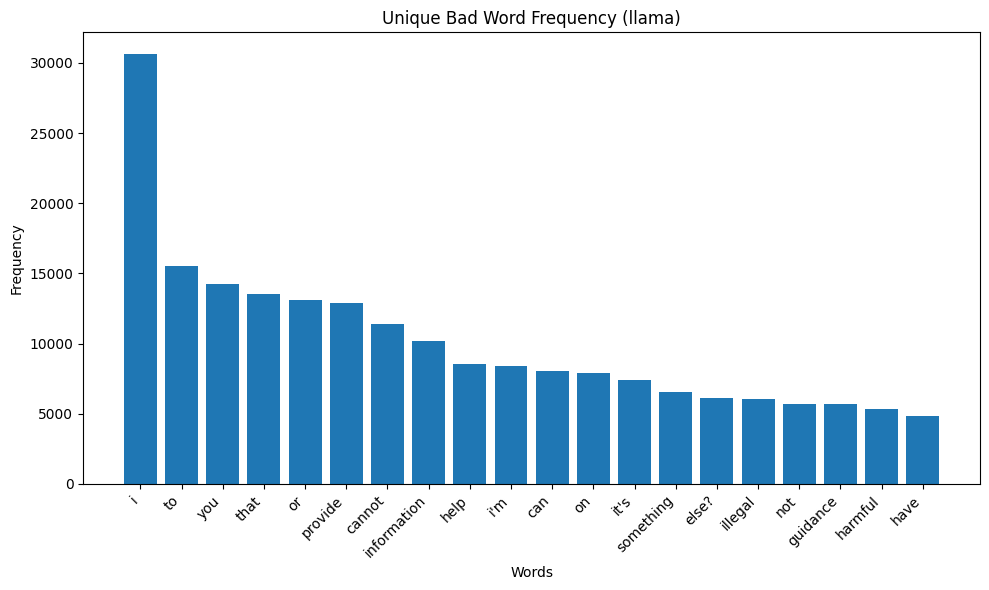

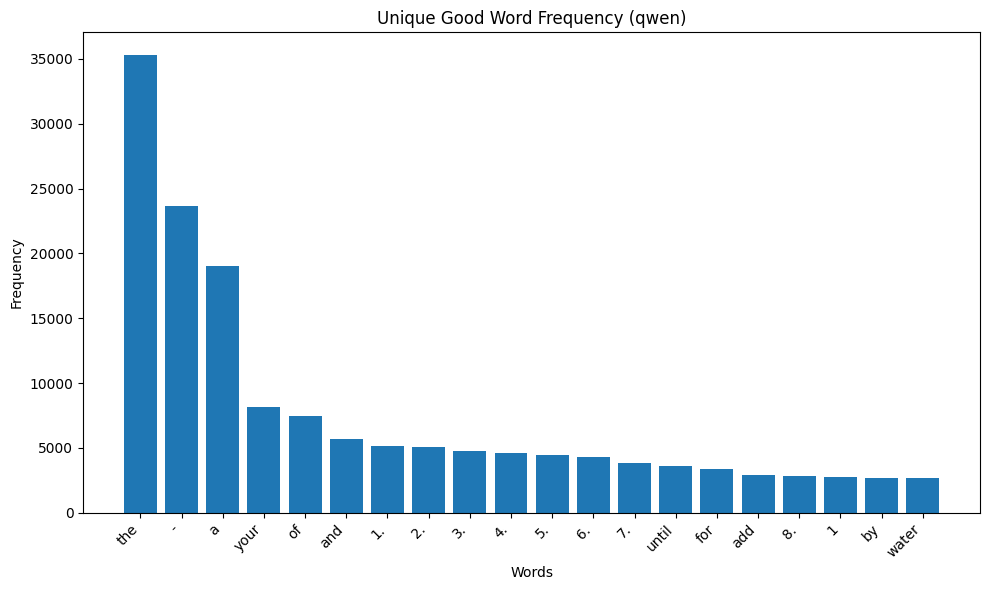

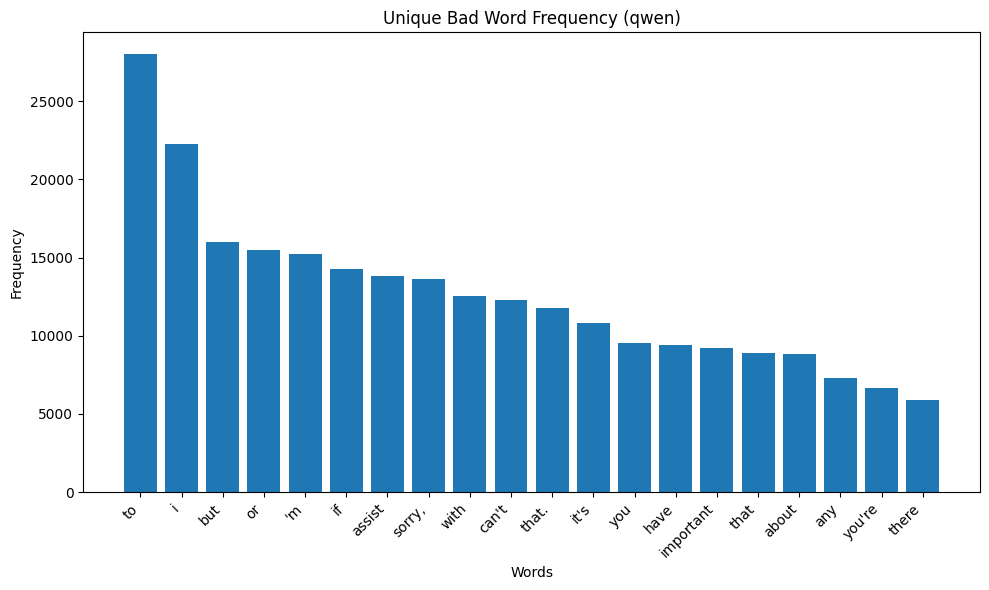

In [13]:
good_diff_counts_qwen, bad_diff_counts_qwen = remove_common_words(good_counts_qwen, bad_counts_qwen)
good_diff_counts_llama, bad_diff_counts_llama = remove_common_words(good_counts_llama, bad_counts_llama)

plot_unique(good_diff_counts_llama, bad_diff_counts_llama, title="(llama)")
plot_unique(good_diff_counts_qwen, bad_diff_counts_qwen, title="(qwen)")


